In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

(356, 493)


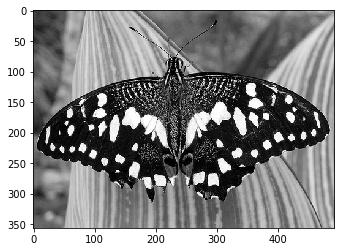

In [3]:
img=plt.imread('/home/deepesh/Downloads/HW1_Data/HW1_Q3/butterfly.jpg')
img=img/255.0
img=rgb2gray(img)
print(img.shape)
plt.imshow(img, cmap='gray')
plt.show()

In [4]:
def cal(x,y,sigma):
    return ((x**2+y**2-2*sigma**2)/(math.pi*2*sigma**4))*(math.exp(-1*(x**2+y**2)/(2*sigma**2)))

In [5]:
def LOG_filter(sigma):
    size=int(5*sigma)
    if size%2==0:
        size=size+1
    matrix=[[0]*size for i in range(size)]
    for i in range(size):
        for j in range(size):
            matrix[i][j]=cal(i-(size-1)//2,j-(size-1)//2,sigma)
    return np.array(matrix)


[[ 0.0006791   0.00117105  0.00180339  0.00249544  0.0031333   0.00361949
   0.00390941  0.0040036   0.00390941  0.00361949  0.0031333   0.00249544
   0.00180339  0.00117105  0.0006791 ]
 [ 0.00117105  0.00194335  0.0028512   0.00371694  0.00435474  0.00468445
   0.00477939  0.00478651  0.00477939  0.00468445  0.00435474  0.00371694
   0.0028512   0.00194335  0.00117105]
 [ 0.00180339  0.0028512   0.00390941  0.00463273  0.00475468  0.0043155
   0.00370775  0.00342962  0.00370775  0.0043155   0.00475468  0.00463273
   0.00390941  0.0028512   0.00180339]
 [ 0.00249544  0.00371694  0.00463273  0.00464926  0.00342962  0.00129365
  -0.00076413 -0.00161557 -0.00076413  0.00129365  0.00342962  0.00464926
   0.00463273  0.00371694  0.00249544]
 [ 0.0031333   0.00435474  0.00475468  0.00342962  0.         -0.00477142
  -0.00901883 -0.01072582 -0.00901883 -0.00477142  0.          0.00342962
   0.00475468  0.00435474  0.0031333 ]
 [ 0.00361949  0.00468445  0.0043155   0.00129365 -0.00477142 -0.0

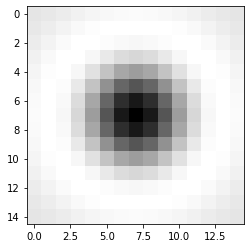

In [6]:
log_fil=LOG_filter(sigma=3)
print(log_fil)
plt.imshow(log_fil, cmap='gray')

In [7]:
def conv_func(image, img_filter):
    m=img_filter.shape[0]
    temp_image=np.pad(image,img_filter.shape[0]//2,mode='edge')
    new_image = np.zeros(image.shape)
    for i in range(new_image.shape[0]):
        for j in range(new_image.shape[1]):
            new_image[i, j] = np.sum(temp_image[i:i+m, j:j+m]*img_filter)
    return new_image

In [8]:
def LOG_conv_image(img,n):
    k=1.414
    sigma=3
    responses=[]
    for i in range(n):
        img_filter=np.array(LOG_filter(sigma))
        print(img_filter.shape)
        conv_img=conv_func(img,img_filter)
        conv_img=np.square(conv_img)
        #print(conv_img.shape)
        l_image = conv_img#.tolist()
        responses.append(l_image)
        sigma=k*sigma
    return np.array(responses)

In [9]:
n=9
responses=LOG_conv_image(img,n)

(15, 15)
(21, 21)
(29, 29)
(43, 43)
(59, 59)
(85, 85)
(119, 119)
(169, 169)
(239, 239)


In [10]:
responses.shape

(9, 356, 493)

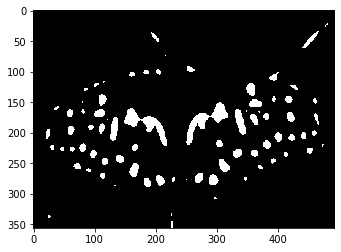

In [11]:
plt.imshow((responses[2]/np.max(responses[2]))>0.15, cmap='gray')

In [12]:
#print(responses[0])

In [13]:
def supression(image,n):
    x,y = image.shape
    new_image = np.copy(image)
    for i in range(0,x,n):
        for j in range(0,y,n):
            val=np.amax(new_image[i:min(i+n,x),j:min(j+n,y)])
            new_image[i:min(i+n,x),j:min(j+n,y)] = np.where(new_image[i:min(i+n,x),j:min(j+n,y)] >= val, new_image[i:min(i+n,x),j:min(j+n,y)], 0)
    return new_image

In [14]:
for i in range(n):
    kernel_size=int((1.414**i)*5*3)
    if kernel_size%2==0:
        kernel_size=kernel_size+1
    #print(kernel_size)
    #print(type(responses[i]))
    responses[i]=supression(responses[i],kernel_size)
    responses[i]=responses[i]/np.max(responses[i])

In [15]:
#print(responses[0])

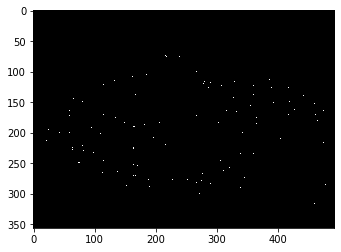

In [16]:
plt.imshow((responses[0])>0.15, cmap='gray')

In [29]:
k=1.414
sigma=3
def finding_max(responses):
    max_cor=[]
    (h,w) = img.shape
    for i in range(h):
        for j in range(w):
            imag = responses[:,i,j]
            imag_max = np.amax(imag)
            if imag_max >= 0.2:
                z,x,y = imag.argmax(),i,j
                max_cor.append((i,j,(k**z)*sigma))
    return max_cor
max_cor = list(finding_max(responses))

In [30]:
len(max_cor)

496

(356, 493)


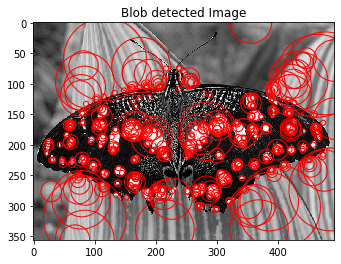

In [31]:
print(img.shape)
f,ax = plt.subplots()
ax.imshow(img,cmap="gray")
ax.set_title('Blob detected Image')
for blob in max_cor:
    y,x,r = blob
    c = plt.Circle((x, y), r*1.414, color='red',fill=False)
    ax.add_patch(c)
plt.show()
#plt.savefig()

In [20]:
# def non_max_supression(blob1,blob2):
#     y0,x0,r0 = blob1
#     y1,x1,r1 = blob2
# #     print(x0,y0,r0)
# #     print(x1,y1,r1)
# #     print('-------------------')
#     r0*=1.414
#     r1*=1.414
#     rr0 = r0 * r0;
#     rr1 = r1 * r1;
#     d = math.sqrt((x1 - x0) * (x1 - x0) + (y1 - y0) * (y1 - y0));
#     if (d > r1 + r0):
#         return 0
    
#     elif (d <= abs(r0 - r1) and r0 >= r1):
#         return 1

#     elif (d <= abs(r0 - r1) and r0 < r1):
#         return 1
    
#     else:
#         phi = (math.acos((rr0 + (d * d) - rr1) / (2 * r0 * d))) * 2
#         theta = (math.acos((rr1 + (d * d) - rr0) / (2 * r1 * d))) * 2
#         area1 = 0.5 * theta * rr1 - 0.5 * rr1 * math.sin(theta)
#         area2 = 0.5 * phi * rr0 - 0.5 * rr0 * math.sin(phi)

#         intersect_area=area1+area2
#         #print(intersect_area)
#         union_area=math.pi*rr0+math.pi*rr1-intersect_area
#         #print(union_area)
#         if intersect_area/union_area > 0.5:
#             return 1
#         else:
#             return 0            

In [21]:
# import copy
# new_cor=max_cor.copy()
# for i in range(len(max_cor)-1):
#     for j in range(i,len(max_cor)):
#         val=non_max_supression(max_cor[i],max_cor[j])
#         if val==1:
#             r0 = max_cor[i][-1]
#             r1 = max_cor[j][-1]
#             if r0>r1 and max_cor[j] in new_cor:
#                 new_cor.remove(max_cor[j])
#             else:
#                 if max_cor[i] in new_cor:
#                     new_cor.remove(max_cor[i])

In [22]:
# from math import sqrt
# def blob_overlap(blob1, blob2):
#     n_dim = len(blob1) - 1
#     root_ndim = sqrt(n_dim)
#     #print(n_dim)
    
#     # radius of two blobs
#     r1 = blob1[-1] * root_ndim
#     r2 = blob2[-1] * root_ndim
    
#     d = sqrt(np.sum((blob1[:-1] - blob2[:-1])**2))
    
#     #no overlap between two blobs
# #     if d > r1 + r2:
#         return 0
#     # one blob is inside the other, the smaller blob must die
#     elif d <= abs(r1 - r2):
#         return 1
#     else:
#         #computing the area of overlap between blobs
#         ratio1 = (d ** 2 + r1 ** 2 - r2 ** 2) / (2 * d * r1)
#         ratio1 = np.clip(ratio1, -1, 1)
#         acos1 = math.acos(ratio1)
#         ratio2 = (d ** 2 + r2 ** 2 - r1 ** 2) / (2 * d * r2)
#         ratio2 = np.clip(ratio2, -1, 1)
#         acos2 = math.acos(ratio2)
#         a = -d + r2 + r1
#         b = d - r2 + r1
#         c = d + r2 - r1
#         d = d + r2 + r1
#         area = (r1 ** 2 * acos1 + r2 ** 2 * acos2 -0.5 * sqrt(abs(a * b * c * d)))
#         return area/(math.pi * (min(r1, r2) ** 2))

In [23]:
# from scipy import spatial
# def redundancy(blobs_array, overlap):
#     sigma = blobs_array[:, -1].max()
#     distance = 2 * sigma * sqrt(blobs_array.shape[1] - 1)
#     tree = spatial.cKDTree(blobs_array[:, :-1])
#     pairs = np.array(list(tree.query_pairs(distance)))
#     if len(pairs) == 0:
#         return blobs_array
#     else:
#         for (i, j) in pairs:
#             blob1, blob2 = blobs_array[i], blobs_array[j]
#             if blob_overlap(blob1, blob2) > overlap:
#                 if blob1[-1] > blob2[-1]:
#                     blob2[-1] = 0
#                 else:
#                     blob1[-1] = 0
#         return np.array([b for b in blobs_array if b[-1] > 0])

In [24]:
# co_ordinates = np.array(max_cor)
# co_ordinates = redundancy(co_ordinates,0.5)

In [1]:
# f,ax = plt.subplots()
# ax.imshow(img,cmap="gray")
# ax.set_title('Blob detected Image')
# for blob in co_ordinates:
#     y,x,r = blob
#     c = plt.Circle((x, y), r*1.414, color='red',fill=False)
#     ax.add_patch(c)
# plt.show()
# #plt.savefig()